# ISLR Chapter 2 - End of Chapter Applied exercises code portion solutions

Exercises from:
"An Introduction to Statistical Learning
with Applications in R" (Springer, 2013)
by
Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Data:
http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Code Solutions by Arthur Avila

8. This exercise relates to the College data set, which can be found in the file College.csv . It contains a number of variables for 777 different universities and colleges in the US. The variables are  
  * `Private` : Public/private indicator  
  * `Apps` : Number of applications received  
  * `Accept` : Number of applicants accepted  
  * `Enroll` : Number of new students enrolled  
  * `Top10perc` : New students from top 10 % of high school class  
  * `Top25perc` : New students from top 25 % of high school class  
  * `F.Undergrad` : Number of full-time undergraduates  
  * `P.Undergrad` : Number of part-time undergraduates  
  * `Outstate` : Out-of-state tuition  
  * `Room.Board` : Room and board costs  
  * `Books` : Estimated book costs  
  * `Personal` : Estimated personal spending  
  * `PhD` : Percent of faculty with Ph.D.’s  
  * `Terminal` : Percent of faculty with terminal degree  
  * `S.F.Ratio` : Student/faculty ratio  
  * `perc.alumni` : Percent of alumni who donate  
  * `Expend` : Instructional expenditure per student  
  * `Grad.Rate` : Graduation rate  

Before reading the data into `R` , it can be viewed in Excel or a text
editor.

  (a) Use the `read.csv()` function to read the data into `R` . Call the loaded data `college` . Make sure that you have the directory set to the correct location for the data.

In [1]:
college = read.csv('College.csv')
print(head(college))
str(college)

                             X Private Apps Accept Enroll Top10perc Top25perc
1 Abilene Christian University     Yes 1660   1232    721        23        52
2           Adelphi University     Yes 2186   1924    512        16        29
3               Adrian College     Yes 1428   1097    336        22        50
4          Agnes Scott College     Yes  417    349    137        60        89
5    Alaska Pacific University     Yes  193    146     55        16        44
6            Albertson College     Yes  587    479    158        38        62
  F.Undergrad P.Undergrad Outstate Room.Board Books Personal PhD Terminal
1        2885         537     7440       3300   450     2200  70       78
2        2683        1227    12280       6450   750     1500  29       30
3        1036          99    11250       3750   400     1165  53       66
4         510          63    12960       5450   450      875  92       97
5         249         869     7560       4120   800     1500  76       72
6         

(b) Look at the data using the `fix()` function. You should notice
that the first column is just the name of each university. We don’t
really want `R` to treat this as data. However, it may be handy to
have these names for later. Try the following commands:
```
> rownames ( college ) = college [ ,1]
> fix ( college )
```
You should see that there is now a `row.names` column with the
name of each university recorded. This means that `R` has given
each row a name corresponding to the appropriate university. `R`
will not try to perform calculations on the row names. However,
we still need to eliminate the first column in the data where the
names are stored. Try
```
> college = college [ , -1]
> fix ( college )
```
Now you should see that the first data column is `Private` . Note
that another column labeled `row.names` now appears before the
`Private` column. However, this is not a data column but rather
the name that `R` is giving to each row.

In [2]:
rownames(college) = college[,1]
print(head(college))
college = college[,-1]
print(head(college))
str(college)

                                                        X Private Apps Accept
Abilene Christian University Abilene Christian University     Yes 1660   1232
Adelphi University                     Adelphi University     Yes 2186   1924
Adrian College                             Adrian College     Yes 1428   1097
Agnes Scott College                   Agnes Scott College     Yes  417    349
Alaska Pacific University       Alaska Pacific University     Yes  193    146
Albertson College                       Albertson College     Yes  587    479
                             Enroll Top10perc Top25perc F.Undergrad P.Undergrad
Abilene Christian University    721        23        52        2885         537
Adelphi University              512        16        29        2683        1227
Adrian College                  336        22        50        1036          99
Agnes Scott College             137        60        89         510          63
Alaska Pacific University        55        16        4

(c)
  i. Use the `summary()` function to produce a numerical summary
of the variables in the data set.  

In [3]:
summary(college)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

  ii. Use the `pairs()` function to produce a scatterplot matrix of
the first ten columns or variables of the data. Recall that
you can reference the first ten columns of a matrix `A` using
`A[,1:10]` .  

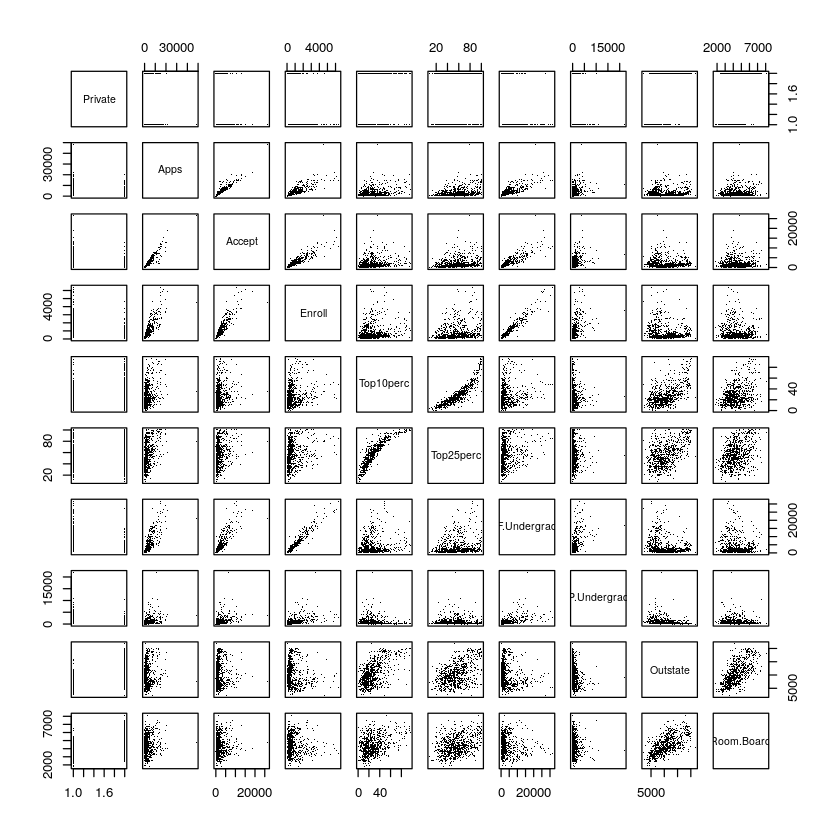

In [4]:
pairs(college[,1:10], pch='.')

  iii. Use the `plot()` function to produce side-by-side boxplots of
`Outstate` versus `Private` .  

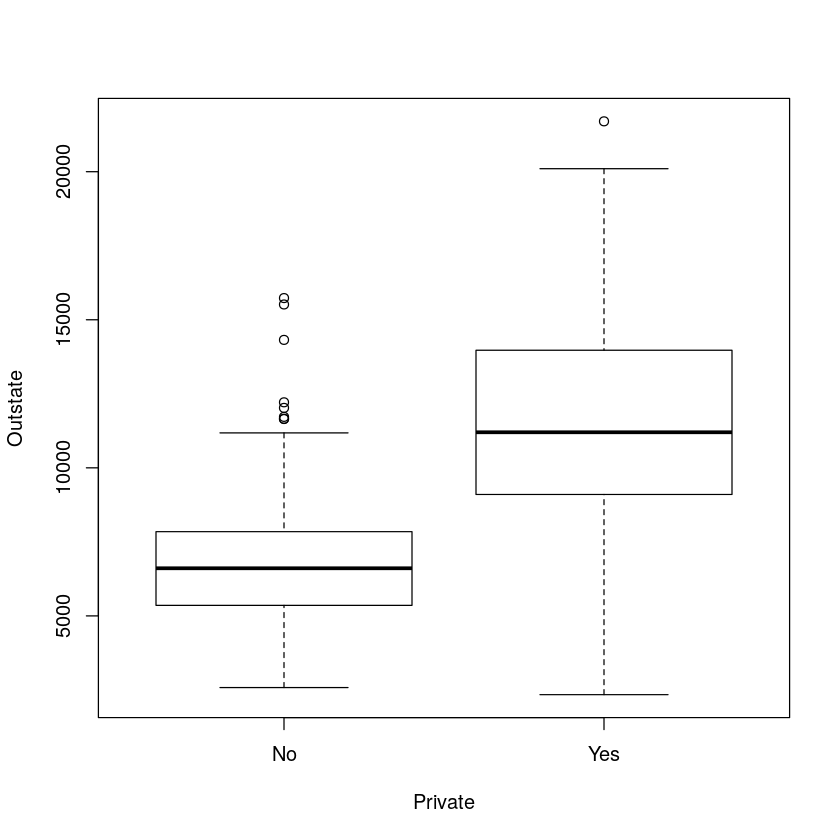

In [5]:
plot(Outstate~Private, data=college)

  iv. Create a new qualitative variable, called `Elite` , by binning
the `Top10perc` variable. We are going to divide universities
into two groups based on whether or not the proportion
of students coming from the top 10% of their high school
classes exceeds 50%.
```
> Elite = rep ("No", nrow(college))
> Elite [college$Top10perc > 50] = "Yes"
> Elite = as.factor(Elite)
> college = data.frame(college, Elite)
```
Use the `summary()` function to see how many elite universities 
there are. Now use the `plot()` function to produce
side-by-side boxplots of `Outstate` versus `Elite` .  

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

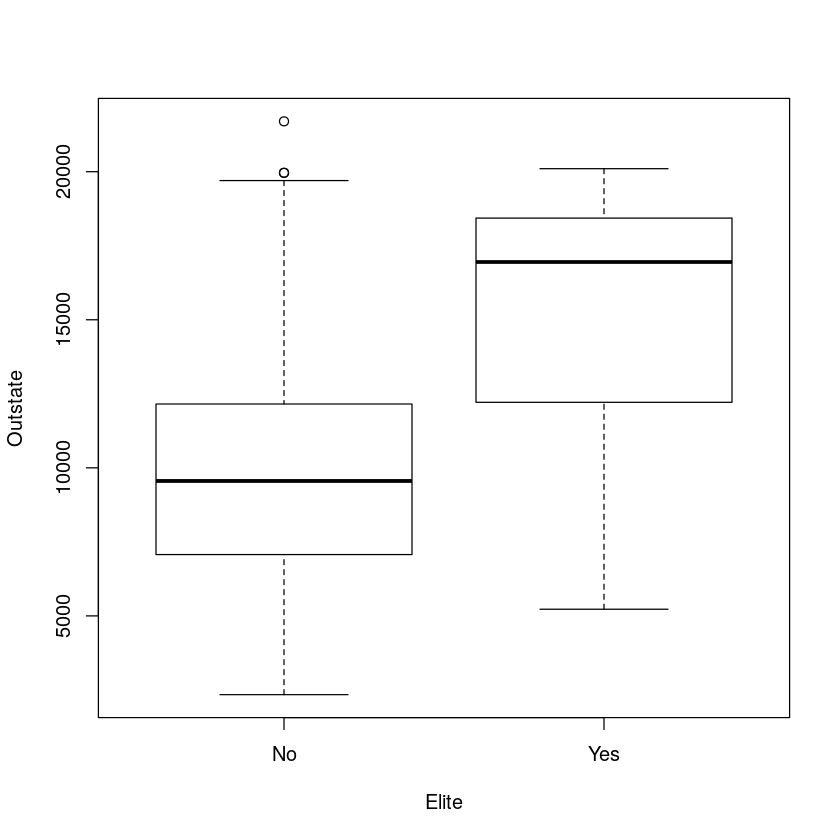

In [6]:
college['Elite'] = as.factor(ifelse(college$Top10perc > 50,'Yes','No'))
print(summary(college))
plot(Outstate~Elite, data=college)

  v. Use the `hist()` function to produce some histograms with
differing numbers of bins for a few of the quantitative variables. 
You may find the command `par(mfrow=c(2,2))` useful:
it will divide the print window into four regions so that four
plots can be made simultaneously. Modifying the arguments
to this function will divide the screen in other ways.  

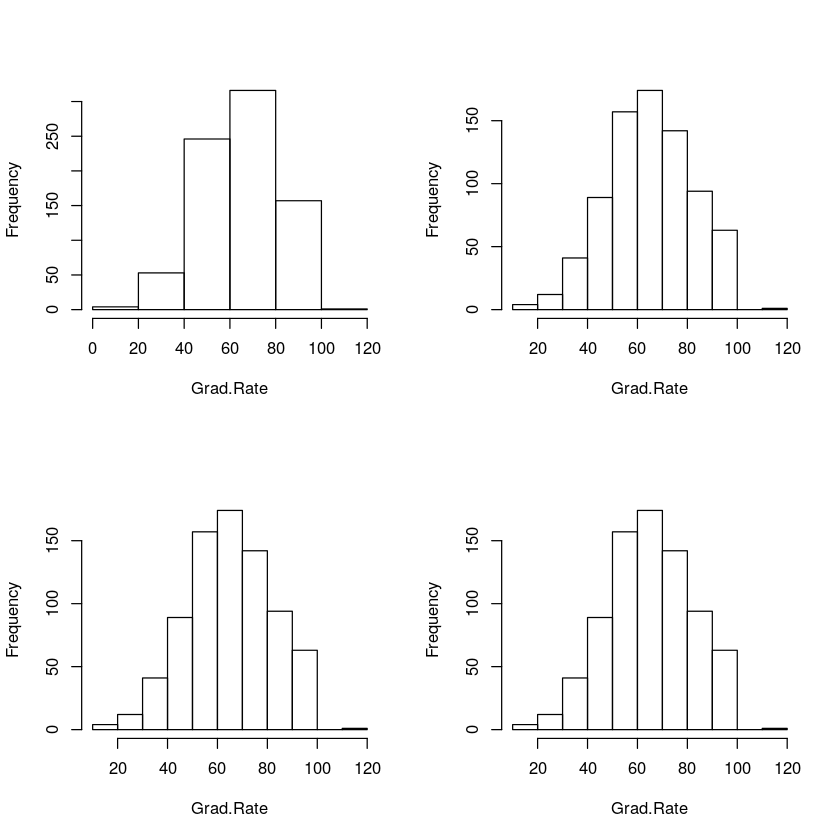

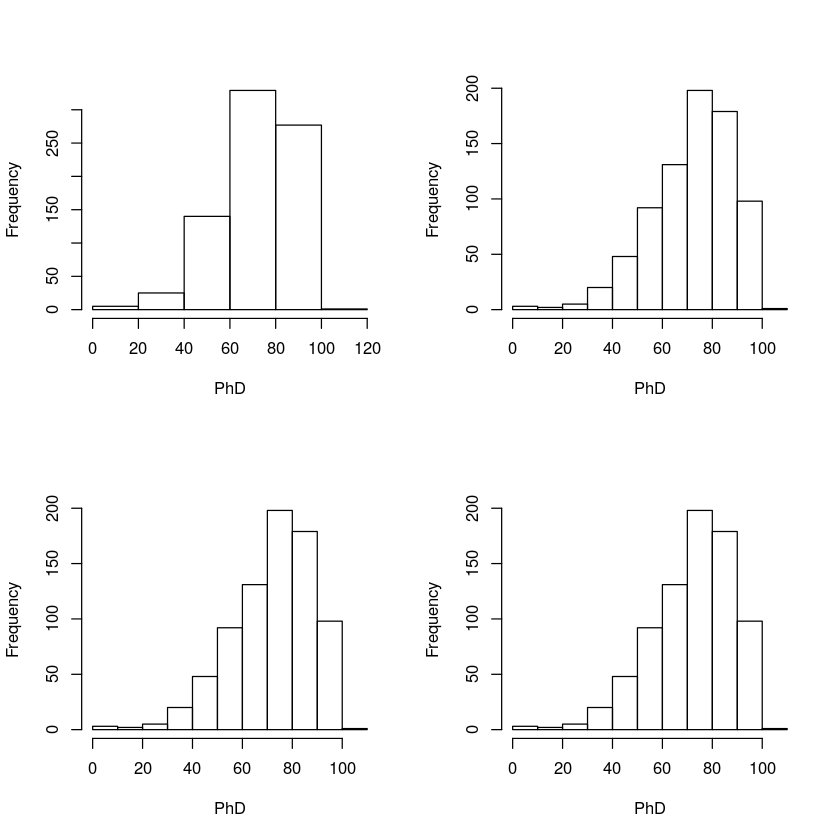

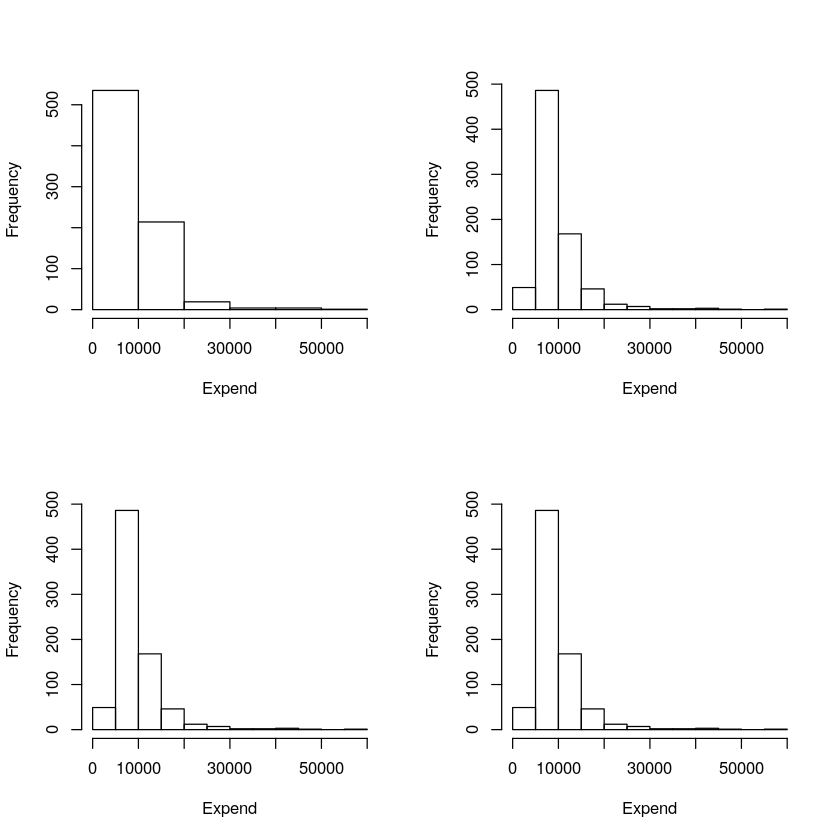

In [7]:
histpanel = function(df,col){
    x=as.numeric(unlist(df[col]))
    par(mfrow=c(2,2))
    hist(x,breaks=6, xlab=col, main=NA)
    hist(x,breaks=8, xlab=col, main=NA)
    hist(x,breaks=10, xlab=col, main=NA)
    hist(x,breaks=12, xlab=col, main=NA)
}


histpanel(college,'Grad.Rate')
histpanel(college,'PhD')
histpanel(college,'Expend')

  vi. Continue exploring the data, and provide a brief summary
of what you discover.

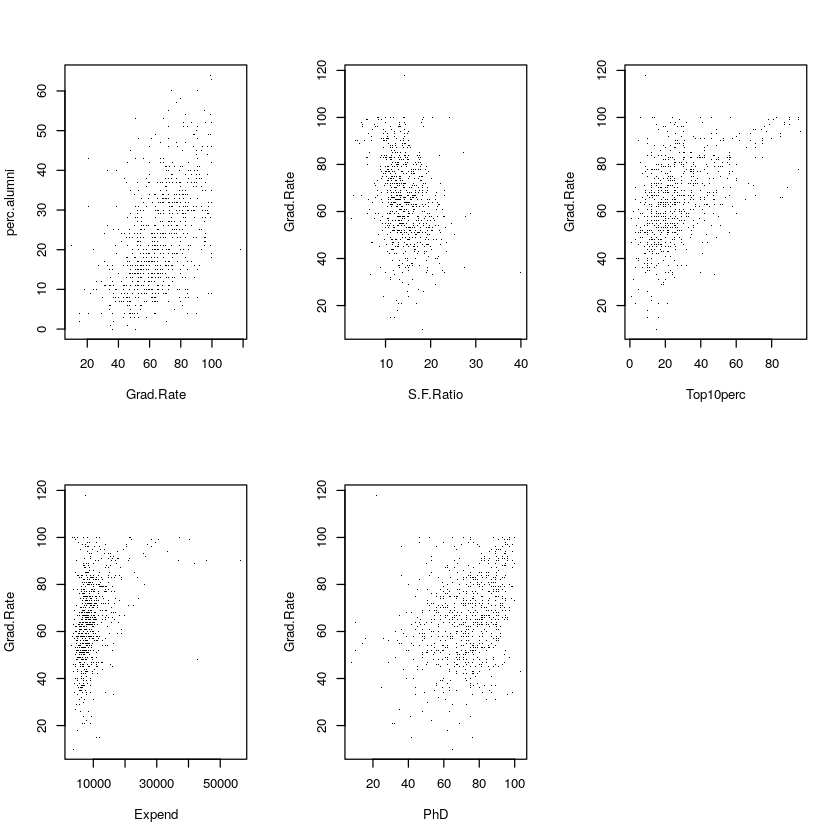

In [8]:
par(mfrow=c(2,3), pch='.')
attach(college)
plot(perc.alumni~Grad.Rate)
plot(Grad.Rate~S.F.Ratio)
plot(Grad.Rate~Top10perc)
plot(Grad.Rate~Expend)
plot(Grad.Rate~PhD)
detach(college)

9. This exercise involves the `Auto` data set studied in the lab. Make sure that the missing values have been removed from the data.  

  (a) Which of the predictors are quantitative, and which are qualitative?  

In [9]:
auto = read.table('Auto.data', na.strings='?', header=T)
print(dim(auto))
auto = auto[!apply(auto,1,anyNA),]
print(dim(auto))
summary(auto)
str(auto)


auto[,c('cylinders','year','origin')] = with(auto,return(data.frame(as.factor(cylinders),as.factor(year),as.factor(origin))))
summary(auto)
str(auto)


[1] 397   9
[1] 392   9


      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


      mpg        cylinders  displacement     horsepower        weight    
 Min.   : 9.00   3:  4     Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   4:199     1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   5:  3     Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   6: 83     Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   8:103     3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60             Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                         
  acceleration        year     origin                  name    
 Min.   : 8.00   73     : 40   1:245   amc matador       :  5  
 1st Qu.:13.78   78     : 36   2: 68   ford pinto        :  5  
 Median :15.50   76     : 34   3: 79   toyota corolla    :  5  
 Mean   :15.54   75     : 30           amc gremlin       :  4  
 3rd Qu.:17.02   82     : 30           amc hornet        :  4  
 Max.   :24.80   70     

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : Factor w/ 5 levels "3","4","5","6",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : Factor w/ 13 levels "70","71","72",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ origin      : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


  (b) What is the range of each quantitative predictor? You can answer this using the `range()` function.  

In [10]:
quant = c('mpg', 'displacement', 'horsepower', 'weight', 'acceleration')
apply(auto,2,range)[,quant]

mpg,displacement,horsepower,weight,acceleration
9.0,68.0,46,1613,8.0
46.6,455.0,230,5140,24.8


  (c) What is the mean and standard deviation of each quantitative
predictor?  

In [11]:
cbind(mean = apply(auto[,quant],2,mean),
      std = apply(auto[,quant],2,sd))


,mean,std
mpg,23.44592,7.805007
displacement,194.41199,104.644004
horsepower,104.46939,38.491160
weight,2977.58418,849.402560
acceleration,15.54133,2.758864


  (d) Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?  

In [12]:
cbind(t(apply(auto[-(10:85),quant],2,range)),
      mean = apply(auto[-(10:85),quant],2,mean),
      std = apply(auto[-(10:85),quant],2,sd))
#auto2 = auto.query('10 > index or index > 84')
#print(auto2.describe())

,,,mean,std
mpg,11.0,46.6,24.40443,7.867283
displacement,68.0,455.0,187.24051,99.678367
horsepower,46.0,230.0,100.72152,35.708853
weight,1649.0,4997.0,2935.97152,811.300208
acceleration,8.5,24.8,15.72690,2.693721


  (e) Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.  

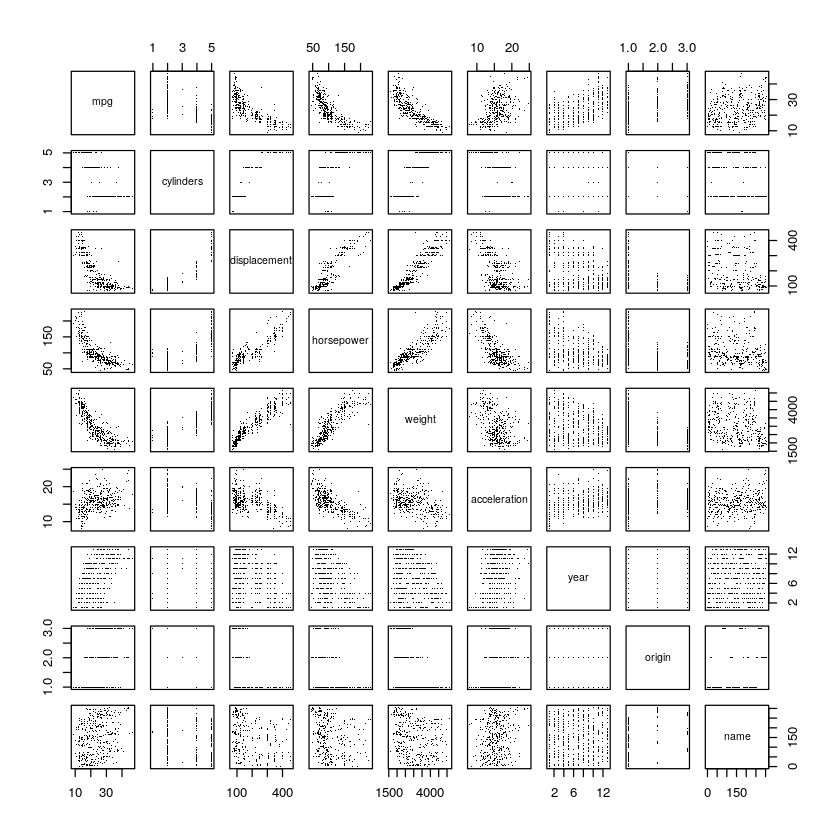

In [13]:
pairs(auto, pch='.')

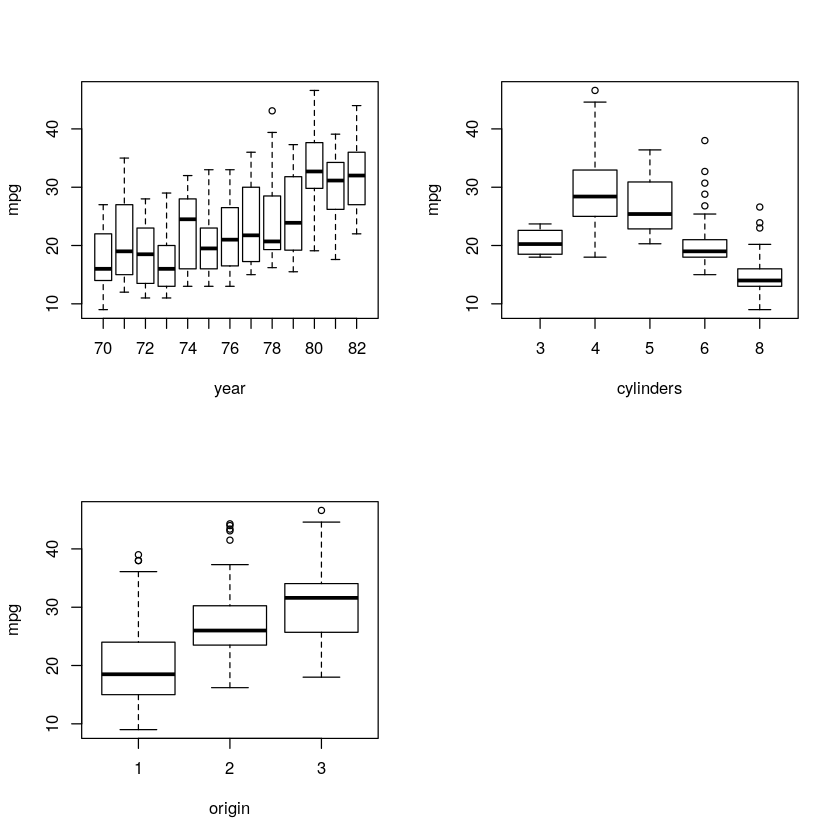

In [14]:
par(mfrow=c(2,2))
plot(mpg~year, data = auto)
plot(mpg~cylinders, data = auto)
plot(mpg~origin, data = auto)

  (f) Suppose that we wish to predict gas mileage (`mpg`) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting `mpg`? Justify your
answer.

10. This exercise involves the `Boston` housing data set.  

  (a) To begin, load in the Boston data set. The Boston data set is
part of the `MASS` library in `R`.
```
> library ( MASS )
```  
  Now the data set is contained in the object `Boston`.
```
> Boston
```
  Read about the data set:
```
> ? Boston
```
  How many rows are in this data set? How many columns? What
do the rows and columns represent?

In [15]:
require(MASS)
print(dim(Boston))
#Boston
cat('
Format

This data frame contains the following columns:

crim:    per capita crime rate by town.
zn:      proportion of residential land zoned for lots over 25,000 sq.ft.
indus:   proportion of non-retail business acres per town.
chas:    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
nox:     nitrogen oxides concentration (parts per 10 million).
rm:      average number of rooms per dwelling.
age:     proportion of owner-occupied units built prior to 1940.
dis:     weighted mean of distances to five Boston employment centres.
rad:     index of accessibility to radial highways.
tax:     full-value property-tax rate per $10,000.
ptratio: pupil-teacher ratio by town.
black:   1000(𝐵𝑘−0.63)^2 where 𝐵𝑘 is the proportion of blacks by town.
lstat:   lower status of the population (percent).
medv:    median value of owner-occupied homes in $1000s.
')

Loading required package: MASS


[1] 506  14

Format

This data frame contains the following columns:

crim:    per capita crime rate by town.
zn:      proportion of residential land zoned for lots over 25,000 sq.ft.
indus:   proportion of non-retail business acres per town.
chas:    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
nox:     nitrogen oxides concentration (parts per 10 million).
rm:      average number of rooms per dwelling.
age:     proportion of owner-occupied units built prior to 1940.
dis:     weighted mean of distances to five Boston employment centres.
rad:     index of accessibility to radial highways.
tax:     full-value property-tax rate per $10,000.
ptratio: pupil-teacher ratio by town.
black:   1000(𝐵𝑘−0.63)^2 where 𝐵𝑘 is the proportion of blacks by town.
lstat:   lower status of the population (percent).
medv:    median value of owner-occupied homes in $1000s.


  (b) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

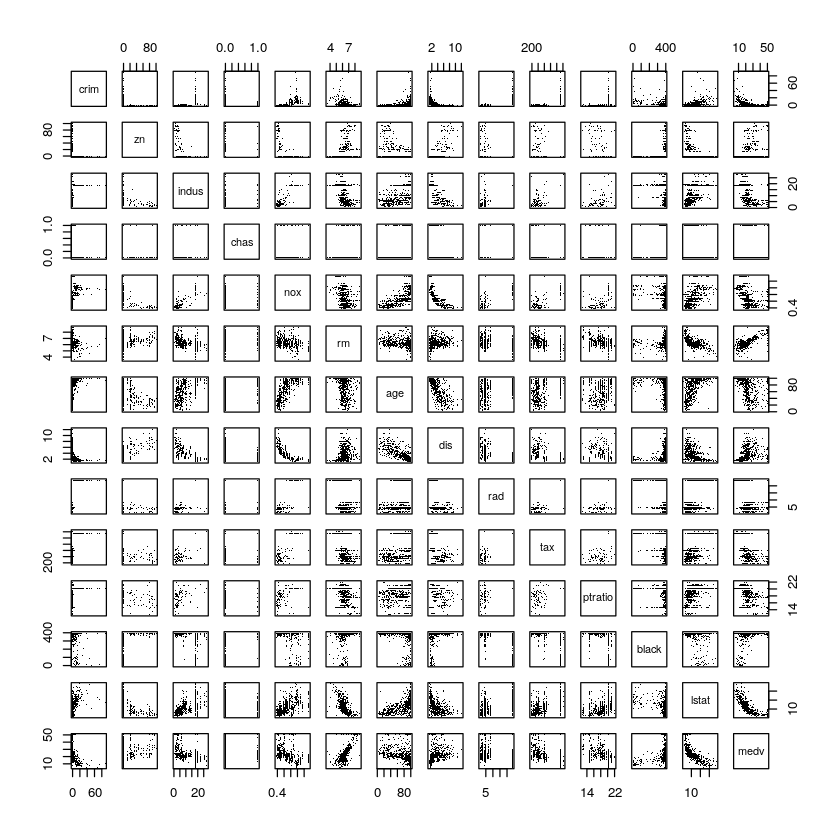

In [16]:
pairs(Boston, pch='.')

(c) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.
(d) Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

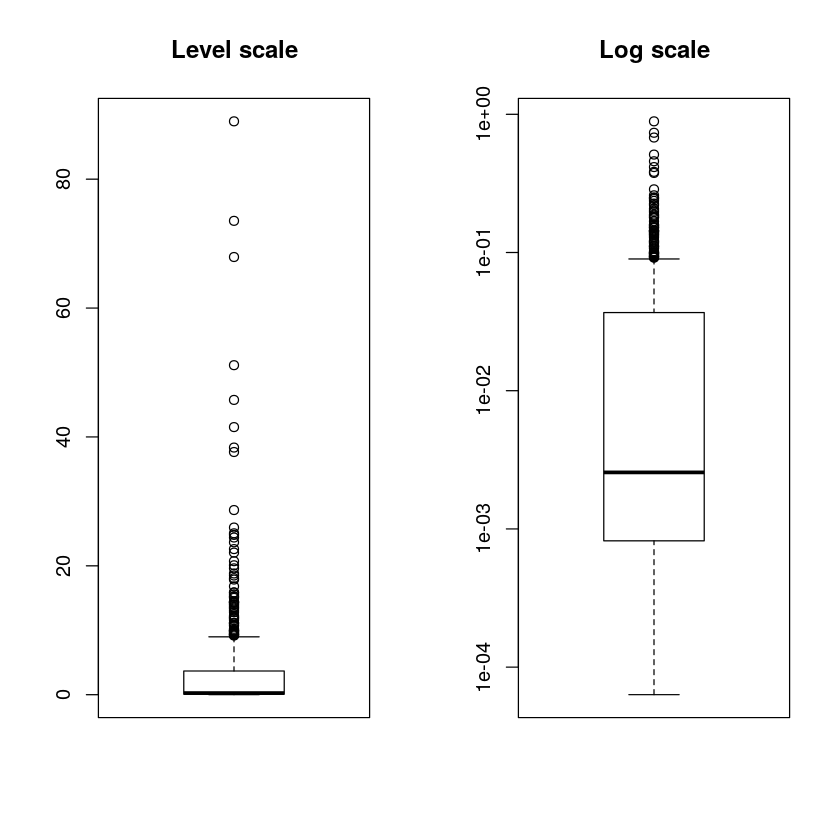

In [17]:
print(summary(Boston))
par(mfrow=c(1,2))
boxplot(Boston$crim, main='Level scale')
boxplot(Boston$crim/100, log='y', main='Log scale')

outl = length(which(abs(Boston$crim)> mean(Boston$crim)+3*sd(Boston$crim)))

cat(paste("\n\nThere are", outl, "high crime rate extreme outliers"))

(e) How many of the suburbs in this data set bound the Charles
river?

In [18]:
sum(Boston$chas)

[1] 35

(f) What is the median pupil-teacher ratio among the towns in this
data set?

In [19]:
median(Boston$ptratio)

[1] 19.05

(g) Which suburb of Boston has lowest median value of owner-
occupied homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

In [20]:
print(Boston[Boston$age == min(Boston$age),])
cat('\nPercentiles\n')
print(apply(Boston,2,rank)[Boston$age == min(Boston$age),]/nrow(Boston))
cat('\nRatio with mean\n')
print(Boston[Boston$age == min(Boston$age),]/apply(Boston,2,mean))

      crim zn indus chas   nox   rm age    dis rad tax ptratio  black lstat
42 0.12744  0  6.91    0 0.448 6.77 2.9 5.7209   3 233    17.9 385.41  4.84
   medv
42 26.6

Percentiles
       crim          zn       indus        chas         nox          rm 
0.355731225 0.368577075 0.377470356 0.466403162 0.239130435 0.806324111 
        age         dis         rad         tax     ptratio       black 
0.001976285 0.809288538 0.125494071 0.098814229 0.355731225 0.357707510 
      lstat        medv 
0.114624506 0.772727273 

Ratio with mean
         crim zn     indus chas      nox       rm        age      dis       rad
42 0.03526752  0 0.6204667    0 0.807651 1.077231 0.04228953 1.507467 0.3141556
         tax   ptratio    black     lstat     medv
42 0.5707467 0.9698988 1.080566 0.3825161 1.180501


(h) In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [21]:
sevencount = length(which(Boston$rm > 7))
eightcount = length(which(Boston$rm > 8))
print(paste('There are',sevencount, 'suburbs that average more than 7 rooms per dwelling.'))
print(paste('There are',eightcount, 'suburbs that average more than 8 rooms per dwelling:'))
print(Boston[Boston$rm > 8,])


[1] "There are 64 suburbs that average more than 7 rooms per dwelling."
[1] "There are 13 suburbs that average more than 8 rooms per dwelling:"
       crim zn indus chas    nox    rm  age    dis rad tax ptratio  black lstat
98  0.12083  0  2.89    0 0.4450 8.069 76.0 3.4952   2 276    18.0 396.90  4.21
164 1.51902  0 19.58    1 0.6050 8.375 93.9 2.1620   5 403    14.7 388.45  3.32
205 0.02009 95  2.68    0 0.4161 8.034 31.9 5.1180   4 224    14.7 390.55  2.88
225 0.31533  0  6.20    0 0.5040 8.266 78.3 2.8944   8 307    17.4 385.05  4.14
226 0.52693  0  6.20    0 0.5040 8.725 83.0 2.8944   8 307    17.4 382.00  4.63
227 0.38214  0  6.20    0 0.5040 8.040 86.5 3.2157   8 307    17.4 387.38  3.13
233 0.57529  0  6.20    0 0.5070 8.337 73.3 3.8384   8 307    17.4 385.91  2.47
234 0.33147  0  6.20    0 0.5070 8.247 70.4 3.6519   8 307    17.4 378.95  3.95
254 0.36894 22  5.86    0 0.4310 8.259  8.4 8.9067   7 330    19.1 396.90  3.54
258 0.61154 20  3.97    0 0.6470 8.704 86.9 1.8010   5 2